In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
zarr_path = "/Datastorage/saptarishi.dhanuka_asp25/20230101_20240926_imerg_era5.zarr"
ds=xr.open_zarr(zarr_path, consolidated=True)
ds

<xarray.Dataset> Size: 150GB
Dimensions:                  (time: 2494, latitude: 181, longitude: 360,
                              level: 37)
Coordinates:
    expver                   (time) <U4 40kB dask.array<chunksize=(1,), meta=np.ndarray>
  * latitude                 (latitude) float64 1kB -90.0 -89.0 ... 89.0 90.0
  * level                    (level) uint64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float64 3kB 0.0 1.0 2.0 ... 358.0 359.0
    number                   int64 8B ...
  * time                     (time) datetime64[ns] 20kB 2023-01-01 ... 2024-0...
Data variables: (12/13)
    10m_u_component_of_wind  (time, latitude, longitude) float32 650MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 650MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    2m_temperature           (time, latitude, longitude) float32 650MB dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
    geopotential             (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
    geopotential_at_surface  (latitude, longitude, time) float32 650MB dask.array<chunksize=(181, 360, 2494), meta=np.ndarray>
    land_sea_mask            (latitude, longitude, time) float32 650MB dask.array<chunksize=(181, 360, 2494), meta=np.ndarray>
    ...                       ...
    specific_humidity        (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
    temperature              (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
    total_precipitation_6hr  (time, latitude, longitude) float64 1GB dask.array<chunksize=(312, 23, 45), meta=np.ndarray>
    u_component_of_wind      (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
    v_component_of_wind      (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
    vertical_velocity        (time, level, latitude, longitude) float32 24GB dask.array<chunksize=(1, 37, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2025-06-29T18:17 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [20]:
print("\nData variables:")
print(list(ds.data_vars))    # names only
for name, da in ds.data_vars.items():
    print(f"  {name}: dims={da.dims}, dtype={da.dtype}, attrs={list(da.attrs.keys())}")


Data variables:
['10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature', 'geopotential', 'geopotential_at_surface', 'land_sea_mask', 'mean_sea_level_pressure', 'specific_humidity', 'temperature', 'total_precipitation_6hr', 'u_component_of_wind', 'v_component_of_wind', 'vertical_velocity']
  10m_u_component_of_wind: dims=('time', 'latitude', 'longitude'), dtype=float32, attrs=['GRIB_NV', 'GRIB_Nx', 'GRIB_Ny', 'GRIB_cfName', 'GRIB_cfVarName', 'GRIB_dataType', 'GRIB_gridDefinitionDescription', 'GRIB_gridType', 'GRIB_iDirectionIncrementInDegrees', 'GRIB_iScansNegatively', 'GRIB_jDirectionIncrementInDegrees', 'GRIB_jPointsAreConsecutive', 'GRIB_jScansPositively', 'GRIB_latitudeOfFirstGridPointInDegrees', 'GRIB_latitudeOfLastGridPointInDegrees', 'GRIB_longitudeOfFirstGridPointInDegrees', 'GRIB_longitudeOfLastGridPointInDegrees', 'GRIB_missingValue', 'GRIB_name', 'GRIB_numberOfPoints', 'GRIB_paramId', 'GRIB_shortName', 'GRIB_stepType', 'GRIB_stepUnits', 'GRIB_surface', 'GRIB_

<xarray.DataArray 'total_precipitation_6hr' (time: 2494)> Size: 20kB
dask.array<getitem, shape=(2494,), dtype=float64, chunksize=(312,), chunktype=numpy.ndarray>
Coordinates:
    expver     (time) <U4 40kB dask.array<chunksize=(1,), meta=np.ndarray>
    latitude   float64 8B 29.0
    longitude  float64 8B 77.0
    number     int64 8B ...
  * time       (time) datetime64[ns] 20kB 2023-01-01 ... 2024-09-26T18:00:00
Attributes:
    conversion_method:  Daily rate (mm/day) → 6‑hr accum. (m)
    original_source:    GPM IMERG Final Precipitation L3 1 day 0.1°×0.1° V07
    source:             IMERG daily precipitation converted to 6‑hourly accum...
    units:              m


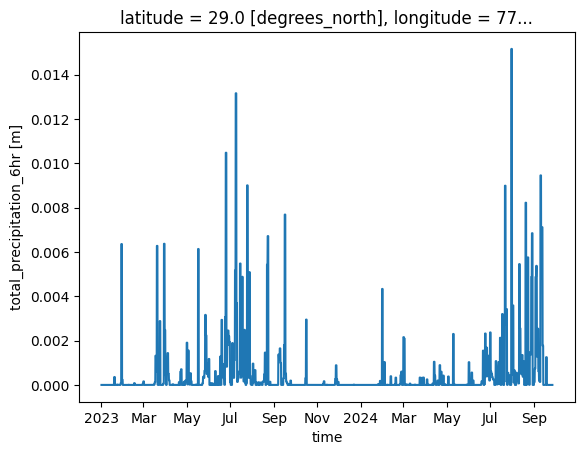

In [21]:
point_precipitation = ds["total_precipitation_6hr"].sel(latitude=28.61,longitude=77.20, method="nearest")
print(point_precipitation)
point_precipitation.plot()

In [30]:
na_box = ds["total_precipitation_6hr"].sel(
    latitude=slice(6.75, 37.10),
    longitude=slice(68.12, 97.42)
)

print(na_box)
print("Shape:", na_box.shape)


<xarray.DataArray 'total_precipitation_6hr' (time: 2494, latitude: 31,
                                             longitude: 29)> Size: 18MB
dask.array<getitem, shape=(2494, 31, 29), dtype=float64, chunksize=(312, 18, 21), chunktype=numpy.ndarray>
Coordinates:
    expver     (time) <U4 40kB dask.array<chunksize=(1,), meta=np.ndarray>
  * latitude   (latitude) float64 248B 7.0 8.0 9.0 10.0 ... 34.0 35.0 36.0 37.0
  * longitude  (longitude) float64 232B 69.0 70.0 71.0 72.0 ... 95.0 96.0 97.0
    number     int64 8B ...
  * time       (time) datetime64[ns] 20kB 2023-01-01 ... 2024-09-26T18:00:00
Attributes:
    conversion_method:  Daily rate (mm/day) → 6‑hr accum. (m)
    original_source:    GPM IMERG Final Precipitation L3 1 day 0.1°×0.1° V07
    source:             IMERG daily precipitation converted to 6‑hourly accum...
    units:              m
Shape: (2494, 31, 29)


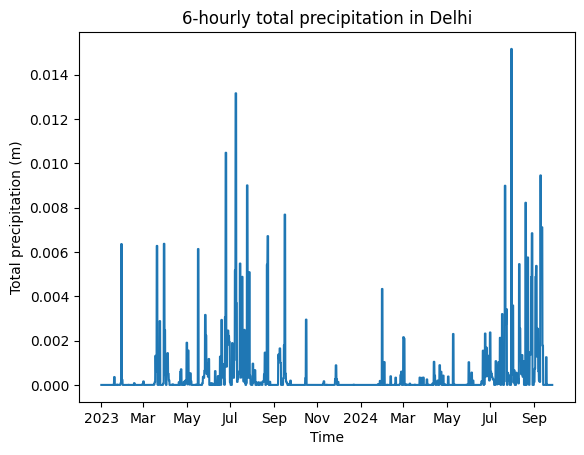

In [12]:
point_ts = ds["total_precipitation_6hr"].sel(latitude=28.61, longitude=77.20, method="nearest")
point_ts.plot()
plt.title("6-hourly total precipitation in Delhi")
plt.ylabel("Total precipitation (m)")
plt.xlabel("Time")
plt.show()  

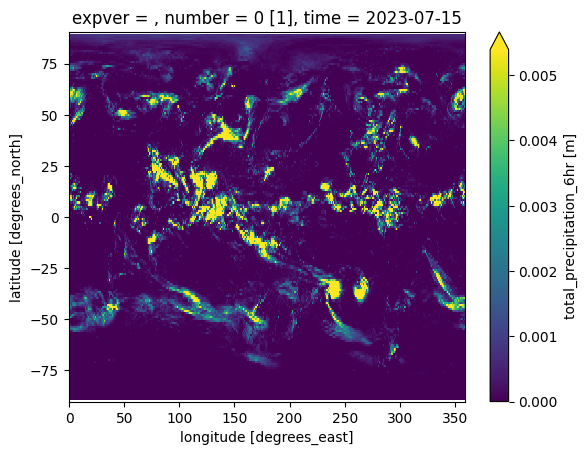

In [41]:
da = ds["total_precipitation_6hr"].sel(time="2023-07-15", method="nearest")
da.plot(robust=True)

In [36]:
ds.sel(time=slice("2023-06-01", "2023-08-31"), latitude=slice(6.75, 37.10), longitude=slice(68.12, 97.42))

<xarray.Dataset> Size: 304MB
Dimensions:                  (time: 367, latitude: 31, longitude: 29, level: 37)
Coordinates:
    expver                   (time) <U4 6kB dask.array<chunksize=(1,), meta=np.ndarray>
  * latitude                 (latitude) float64 248B 7.0 8.0 9.0 ... 36.0 37.0
  * level                    (level) uint64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float64 232B 69.0 70.0 ... 96.0 97.0
    number                   int64 8B ...
  * time                     (time) datetime64[ns] 3kB 2023-06-01 ... 2023-08...
Data variables: (12/13)
    10m_u_component_of_wind  (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    2m_temperature           (time, latitude, longitude) float32 1MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    geopotential             (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    geopotential_at_surface  (latitude, longitude, time) float32 1MB dask.array<chunksize=(31, 29, 367), meta=np.ndarray>
    land_sea_mask            (latitude, longitude, time) float32 1MB dask.array<chunksize=(31, 29, 367), meta=np.ndarray>
    ...                       ...
    specific_humidity        (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    temperature              (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    total_precipitation_6hr  (time, latitude, longitude) float64 3MB dask.array<chunksize=(21, 18, 21), meta=np.ndarray>
    u_component_of_wind      (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    v_component_of_wind      (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    vertical_velocity        (time, level, latitude, longitude) float32 49MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2025-06-29T18:17 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

In [38]:
june_july_aug = ds.sel(time=slice("2023-06-01", "2023-08-31"), latitude=slice(6.75, 37.10), longitude=slice(68.12, 97.42))
prep_mean = june_july_aug["total_precipitation_6hr"].mean(dim="time")
print("Mean precipitation (m):", prep_mean.values)


Mean precipitation (m): [[9.23988401e-04 1.15846728e-03 1.12657016e-03 1.16583784e-03
  1.03957764e-03 9.70316731e-04 1.08822546e-03 1.10197205e-03
  9.24910571e-04 2.98314028e-04 1.84271118e-04 8.66498614e-04
  6.10787617e-04 7.31777933e-05 2.11980580e-05 1.07903609e-04
  3.04506132e-04 4.03869219e-04 5.82938507e-04 1.22262942e-03
  1.21657611e-03 1.15822972e-03 1.04266265e-03 1.28712956e-03
  1.37292828e-03 1.62598687e-03 1.68542743e-03 1.14565224e-03
  7.67918922e-04]
 [1.03318630e-03 9.19261730e-04 1.52888109e-03 1.14510726e-03
  1.10202656e-03 1.51610010e-03 1.75121593e-03 1.75150287e-03
  3.88993523e-04 5.43349785e-05 2.18443463e-05 1.21640832e-04
  2.68320830e-04 2.24012253e-05 6.98978195e-05 3.73331056e-04
  3.90974107e-04 8.57649855e-04 9.72715396e-04 1.07313007e-03
  9.19621903e-04 1.29634874e-03 1.61653517e-03 1.73638703e-03
  1.31679324e-03 8.82058051e-04 1.35123464e-03 1.31696097e-03
  9.70385690e-04]
 [9.79679822e-04 8.35442780e-04 6.65901731e-04 8.63644407e-04
  1.110095

In [39]:
scalar_mean = prep_mean.mean(dim=["latitude", "longitude"])
print("Regional mean precipitation (m):", scalar_mean.values)


Regional mean precipitation (m): 0.0017536294452559183


In [40]:
india=ds.sel(latitude=slice(6.75, 37.10), longitude=slice(68.12, 97.42))
india

<xarray.Dataset> Size: 2GB
Dimensions:                  (time: 2494, latitude: 31, longitude: 29, level: 37)
Coordinates:
    expver                   (time) <U4 40kB dask.array<chunksize=(1,), meta=np.ndarray>
  * latitude                 (latitude) float64 248B 7.0 8.0 9.0 ... 36.0 37.0
  * level                    (level) uint64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float64 232B 69.0 70.0 ... 96.0 97.0
    number                   int64 8B ...
  * time                     (time) datetime64[ns] 20kB 2023-01-01 ... 2024-0...
Data variables: (12/13)
    10m_u_component_of_wind  (time, latitude, longitude) float32 9MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    10m_v_component_of_wind  (time, latitude, longitude) float32 9MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    2m_temperature           (time, latitude, longitude) float32 9MB dask.array<chunksize=(1, 31, 29), meta=np.ndarray>
    geopotential             (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    geopotential_at_surface  (latitude, longitude, time) float32 9MB dask.array<chunksize=(31, 29, 2494), meta=np.ndarray>
    land_sea_mask            (latitude, longitude, time) float32 9MB dask.array<chunksize=(31, 29, 2494), meta=np.ndarray>
    ...                       ...
    specific_humidity        (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    temperature              (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    total_precipitation_6hr  (time, latitude, longitude) float64 18MB dask.array<chunksize=(312, 18, 21), meta=np.ndarray>
    u_component_of_wind      (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    v_component_of_wind      (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
    vertical_velocity        (time, level, latitude, longitude) float32 332MB dask.array<chunksize=(1, 37, 31, 29), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    history:                 2025-06-29T18:17 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

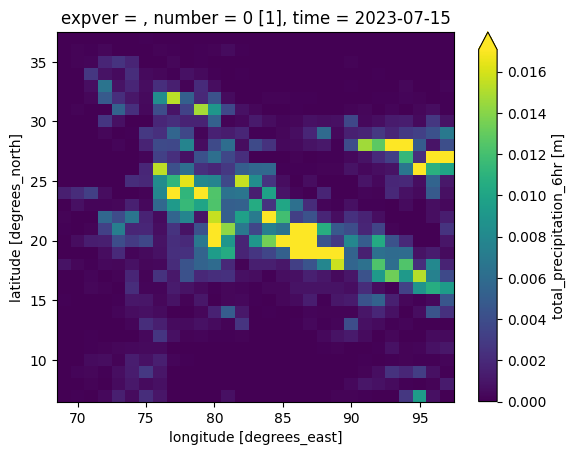

In [44]:
p=india["total_precipitation_6hr"].sel(time="2023-07-15", method="nearest")
p.plot(robust=True)

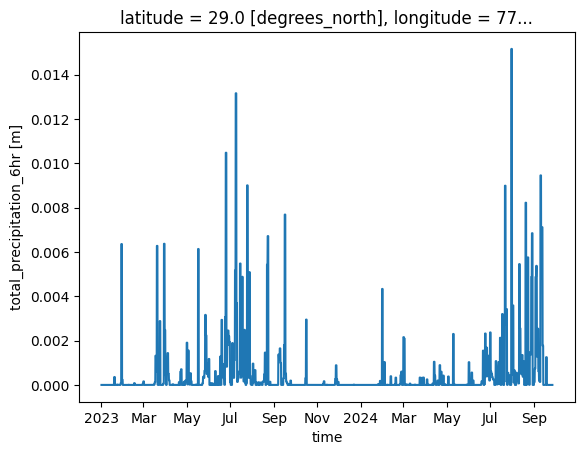

In [46]:
point_p=india["total_precipitation_6hr"].sel(latitude=28.61,longitude=77.20, method="nearest")
point_p.plot()